In [1]:
# import library
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from tqdm import tqdm
import gensim
import gensim.downloader as api

In [ ]:
#
model = api.load("glove-wiki-gigaword-50")

In [39]:
with open('Dataset/LakhMatched/lyric/mxm_dataset_train_cleaned.txt', encoding='utf8') as f:
    lines = f.readlines()

In [40]:
import pandas as pd
import gensim.downloader as api
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import numpy as np
ps = PorterStemmer()
nltk.download('stopwords')
STOPWORDS=stopwords.words('english')
s = pd.read_csv('Dataset/LakhMatched/lyric/stopwords.txt')
s = [x[0] for x in s.values]
STOPWORDS = set(STOPWORDS).union(set(s))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\12364\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
words = lines[17][1:].split(',')
lines = lines[17:]

In [64]:
res = []
for line in tqdm(lines[1:]):
    embedding = np.zeros(50)
    count = 0
    for word in line.split(',')[2:]:
        k,v = (int(x) for x in word.split(':'))
        w = ps.stem(words[k-1].lower())
        if (words[k-1].lower not in STOPWORDS) and (w in model.index_to_key):
            embedding += model[w]*v
            count+=v
    embedding = embedding/count
    res.append(embedding)

100%|████████████████████████████████████████████████████████████████████████| 210519/210519 [1:43:09<00:00, 34.01it/s]


In [65]:
import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(np.array(res))
X_embedded.shape

(210519, 2)

In [66]:
import matplotlib.pyplot as plt

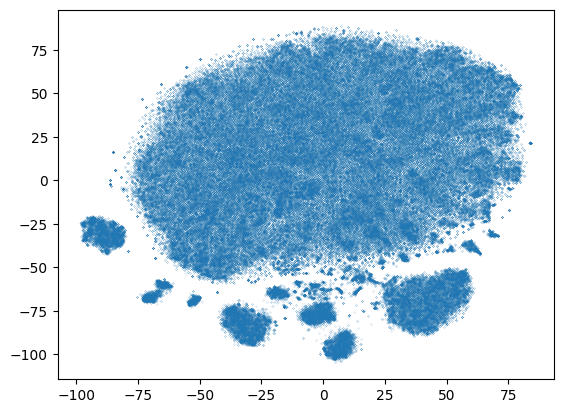

In [69]:
plt.scatter(X_embedded[:, 0], X_embedded[:,1], s =.01)